In [75]:
from __future__ import division
from datetime import datetime, timedelta,date
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np


import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

#Import ARIMA 
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

#Import Keras
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.layers import LSTM
from sklearn.model_selection import KFold, cross_val_score, train_test_split

#Import Prophet
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.plot import plot_plotly
import plotly.offline as py

In [76]:
#LOAD 2019 DATA
revenue_2019_df = pd.read_csv('data/complete_2019_revenue.csv')
print(revenue_2019_df.shape)
revenue_2019_df.head()

(106494, 171)


,period,RA #,Type,Company,Renter,Unit #,Class,Rented As,Loc Out,Loc In,...,ZTFC,ZTRANS,ZTRNF,ZTRP FEE,ZUDRV,ZVLF,ZVRT,Total,PO Number,Service Order Number
0,12,ANA-849,Contract,NaN,"Funa, Lavinia",07DO19075,MVAR,MVAR,ANA,ANA,...,0.0,0.0,0,0,0,148.68,0.0,"1,347.93",NaN,NaN
1,12,ANA-879,Contract,NaN,"IBARRA, ASHLEY",07DO18314,MVAR,MVAR,ANA,ANA,...,0.0,0.0,0,0,0,17.64,0.0,319.34,NaN,NaN
2,12,ANA-882,Contract,NaN,"GAFFOOR, FAHIEM",12FO18020,SVAR,SVAR,ANA,ANA,...,0.0,0.0,0,0,0,20.16,0.0,820.95,NaN,NaN
3,12,ANA-884,Contract,NaN,"FLORESRAMIREZ, ALVARO",15GM18028,FVAR,FVAR,ANA,ANA,...,0.0,0.0,0,0,0,12.6,0.0,786.97,NaN,NaN
4,12,ANA-885,Contract,NaN,"Samani, Matt",12GM18011,SVAR,SVAR,ANA,ANA,...,0.0,0.0,0,0,0,12.6,0.0,574.47,NaN,NaN


In [77]:
#LOAD 2018 DATA
revenue_2018_df = pd.read_csv('data/revenue_2018.csv')
print(revenue_2018_df.shape)
revenue_2018_df.head()

(106563, 165)


,RA #,Type,Company,Renter,Unit #,Class,Rented As,Loc Out,Loc In,Date Out,...,ZTF,ZTRANS,ZTRNF,ZTRP FEE,ZUDRV,ZVLF,ZVRT,Total,PO Number,Service Order Number
0,IAH-10981,Contract,NaN,"HOZACK, CODY",08CH14002,8FUL,8FUL,IAH,IAH,1/19/18,...,0.0,4.0,0.0,0.0,0.0,5.04,0.0,130.50,NaN,NaN
1,IAH-11113,Contract,NaN,"ABAD, JUAN CARLOS",08CH14002,8FUL,8FUL,IAH,IAH,2/8/18,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,NaN,NaN
2,SFO-53527,Contract,NaN,"GARNER, JULIE",08CH14001,8FUL,8FUL,SFO,SFO,2/8/18,...,0.0,20.0,0.0,0.0,0.0,12.60,0.0,402.09,NaN,NaN
3,SFO-53706,Contract,NaN,"EMERSON, ERIC",08CH14001,8FUL,8FUL,SFO,SFO,2/16/18,...,0.0,20.0,0.0,0.0,0.0,10.08,0.0,902.84,NaN,NaN
4,SFO-54667,Contract,NaN,"VANLITH, HANSVAN",08CH14001,8FUL,8FUL,SFO,SFO,3/24/18,...,0.0,20.0,0.0,0.0,0.0,17.64,0.0,681.09,NaN,NaN


In [78]:
#LOAD 2017 DATA
revenue_2017_df = pd.read_csv('data/revenue_2017.csv')
print(revenue_2017_df.shape)
revenue_2017_df.head()

(96909, 159)


,RA #,Type,Company,Renter,Unit #,Class,Rented As,Loc Out,Loc In,Date Out,...,ZSTAX,ZTF,ZTRANS,ZTRNF,ZTRP FEE,ZUDRV,ZVLF,Total,PO Number,Service Order Number
0,ADM-137,Contract,Int. Education Center at DVC,"KARABIYIK, MUSTAFA",15FO16023,FVAR,FVAR,SFO,SFO,6/30/16,...,0.0,0.0,0.0,0,0,0,0.0,41.55,NaN,NaN
1,ADM-180,Contract,NaN,"Transportation, ACE MEDICAL",134DO,MVAR,MVAR,ADMIN,ADMIN,9/1/16,...,0.0,0.0,0.0,0,0,0,0.0,"-1,518.08",NaN,NaN
2,ADM-186,Contract,NaN,"TEST, TEST",07DO16485,MVAR,MVAR,LAX,LAX,2/27/17,...,0.0,0.0,0.0,0,0,0,0.0,-7.67,NaN,NaN
3,DIA-15424,Contract,NaN,"Fitzpatrick, Jill",15FO12008,FVAR,SVAR,DIA,DIA,7/13/16,...,0.0,0.0,0.0,0,0,0,0.0,-193.27,NaN,NaN
4,DIA-15925,Contract,NaN,"ADOLFSON, RYAN JAMES",15FO15047,FVAR,FVAR,DIA,DIA,8/4/16,...,0.0,0.0,0.0,0,0,0,0.0,-813.61,ELECTRIC FOREST,NaN


In [79]:
#Write Pipeline Function for time series data prep

def Data_Prep(df_lst):
    ts_lst =[]
    
    #Put Dataframe in Time Series Format
    for df in df_lst:
        df['Date Out'] = pd.to_datetime(df['Date Out'])
        
        ts = df.groupby('Date Out')['Type'].count()
        
        #ts = daily.resample(freq).sum()
        
        ts_lst.append(ts)
      
    #Combined all Time Series 
    combined_ts = pd.Series()
    for i in range(len(ts_lst)-1,-1,-1):
        combined_ts = ts_lst[i].combine_first(combined_ts)

    #Filter out all 2016 and Prior data because too sparse
    combined_ts = combined_ts[combined_ts.index > '2016-12-31']

    return combined_ts

In [80]:
#Add dataframes to lst
df_lst = [revenue_2017_df, revenue_2018_df, revenue_2019_df]

In [81]:
sales_ts = Data_Prep(df_lst)

print('Total Days: {}\nTotal Sales Count: {:.0f}'.format(len(sales_ts),sum(sales_ts)))

Total Days: 1095
Total Sales Count: 305353


In [82]:
sales_ts.resample('Y').count()

2017-12-31    365
2018-12-31    365
2019-12-31    365
Freq: A-DEC, Name: Type, dtype: int64

In [83]:
def Create_ts_df(sales_ts):
    
    #Turn Time Series into DataFrame with engineered features
    df = pd.DataFrame()
    df['dayofweek'] = [sales_ts.index[i].weekday_name for i in range(len(sales_ts))]
    df['week'] = [sales_ts.index[i].week for i in range(len(sales_ts))]
    df['day'] = [sales_ts.index[i].day for i in range(len(sales_ts))]
    df['month'] = [sales_ts.index[i].month for i in range(len(sales_ts))]
    df['qtr'] = [sales_ts.index[i].quarter for i in range(len(sales_ts))]
    df['year'] = [sales_ts.index[i].year for i in range(len(sales_ts))]
    df['sales'] = [sales_ts[i] for i in range(len(sales_ts))]
    
    return df

In [84]:
sales_df = Create_ts_df(sales_ts)

sales_df.head()

,dayofweek,week,day,month,qtr,year,sales
0,Sunday,52,1,1,1,2017,137.0
1,Monday,1,2,1,1,2017,162.0
2,Tuesday,1,3,1,1,2017,147.0
3,Wednesday,1,4,1,1,2017,148.0
4,Thursday,1,5,1,1,2017,156.0


In [85]:
#Write Function for EDA

def EDA_1(sales_ts):
    #Turn Time Series into DataFrame with engineered features
    df = Create_ts_df(sales_ts)
    
    
    #Choose colors for graphs
    clr = ['b','orange','g']
    
    #Group by year & plot
    yr_grp = df.groupby('year')['sales'].sum()
    yr_grp.plot(kind='bar', color = clr, width=.80, rot=30)
    plt.ylabel('Sales Qty')
    plt.title('Sales Qty by Year')
    

    #Group by year and QTR
    qtr = df.groupby(['year','qtr'])['sales'].sum()
    qtr_df = pd.concat([qtr.loc[2017].rename('2017'), qtr.loc[2018].rename('2018'),qtr.loc[2019].rename('2019')],axis=1)
    qtr_df.plot.bar(figsize=(10,5), color = clr, rot=0)
    plt.ylabel('Sales Qty')
    plt.xticks([0,1,2,3],['Q1','Q2','Q3','Q4'])
    plt.title('Sales Qty by Quarter')

    
    #Group by month and plot
    yr_mnt_grp = df.groupby(['year','month'])['sales'].sum()
    mnt_df = pd.concat([yr_mnt_grp.loc[2017].rename('2017'), yr_mnt_grp.loc[2018].rename('2018'), yr_mnt_grp.loc[2019].rename('2019')],axis=1)
    mnt_df.plot.bar(figsize=(10,5), color = clr, rot=0)
    plt.ylabel('Sales Qty')
    plt.title('Sales Qty by Month')

    
    #create the dow index to be in correct order
    dow_index = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    #Group by year and dayofweek
    dow = df.groupby(['year','dayofweek'])['sales'].sum()
    dow_df = pd.concat([dow.loc[2017].reindex(dow_index).rename('2017'), dow.loc[2018].reindex(dow_index).rename('2018'),dow.loc[2019].reindex(dow_index).rename('2019')],axis=1)
    dow_df.plot.bar(figsize=(10,5), color = clr, rot=0)
    plt.ylabel('Sales Qty')
    plt.title('Sales Qty by Day of Week')

    #Dailiy Frequency
    from pandas import Grouper
    groups = sales_ts.groupby(Grouper(freq='A')) 
    years = pd.DataFrame()
    for name, group in groups:
        years[name.year] = group.values 

    years.plot(subplots=True, legend=True, figsize=(10,5), color=clr, title='Sales Qty Daily Frequency');
    

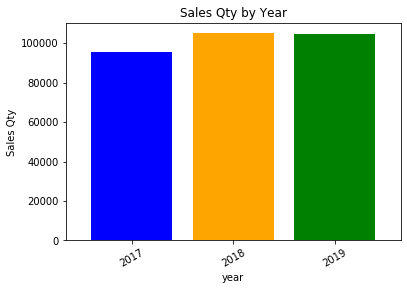

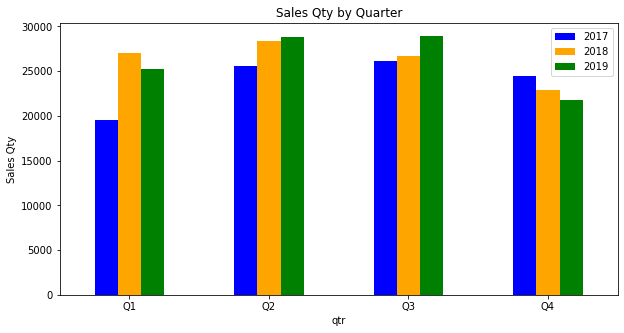

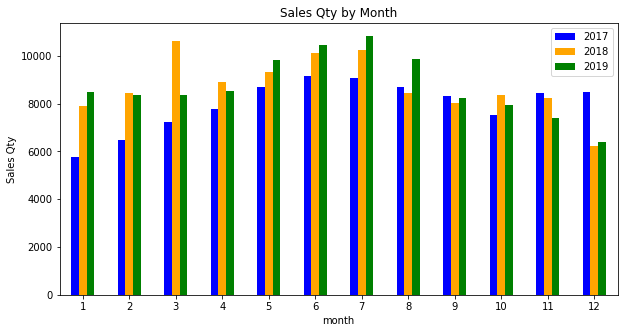

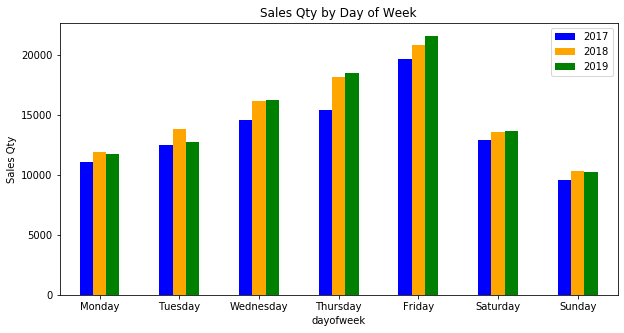

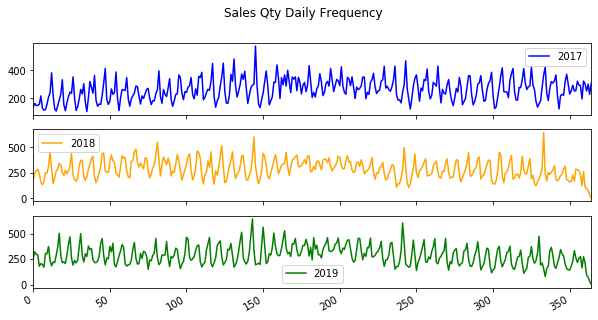

In [86]:
EDA_1(sales_ts)

In [87]:
def EDA_2(sales_ts):
    from pandas import DataFrame
    from pandas import concat
    from matplotlib import pyplot
    from pandas import Grouper
    from pandas import concat
    from pandas.plotting import autocorrelation_plot
    
    #Histogram to show distribution
    sales_ts.hist()
    pyplot.title('Sales Qty Histogram')
    pyplot.xlabel('Sales Qty')
    pyplot.show()
    
    # create a boxplot of monthly data
    groups = sales_ts.groupby(Grouper(freq='M'))
    months = concat([DataFrame(x[1].values) for x in groups], axis=1) 
    months = pd.DataFrame(months)
    months.columns = range(1,37)
    months.boxplot(figsize=(15,5))
    plt.ylabel("Sales Qty")
    plt.title('36 Month BoxPlot')
    pyplot.show()
    
    
    
    # create multiple scatter plots for lags
    values = DataFrame(sales_ts.values) 
    lags = 8
    columns = [values]
    for i in range(1,(lags + 1)): 
        columns.append(values.shift(i))
    dataframe = concat(columns, axis=1) 
    columns = ['t']

    for i in range(1,(lags + 1)):
        columns.append('t-' + str(i)) 
    dataframe.columns = columns 
    pyplot.figure(1,figsize=(15,8))
    for i in range(1,(lags + 1)):
        ax = pyplot.subplot(240 + i)
        ax.set_title('t vs t-' + str(i))
        pyplot.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)
    pyplot.show()
    
    #Autocorrelation Plot on Sales Qty
    pyplot.figure(figsize=(15,5))
    autocorrelation_plot(sales_ts)  
    pyplot.xlabel('Lag in Days')
    pyplot.show()



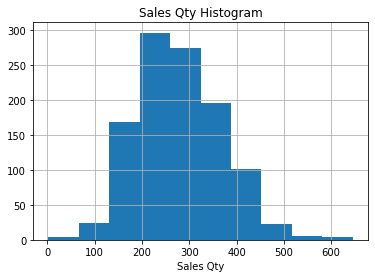

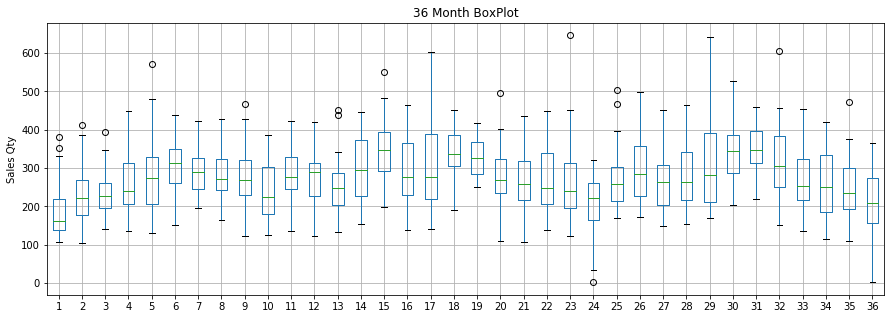

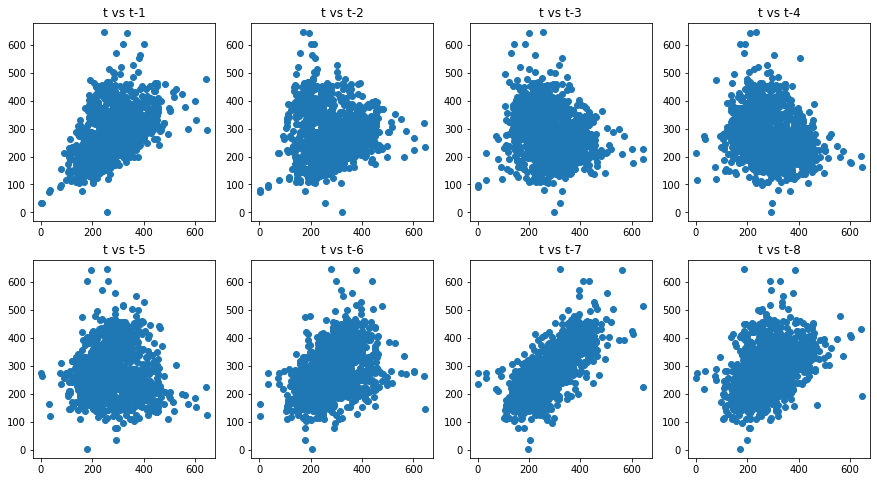

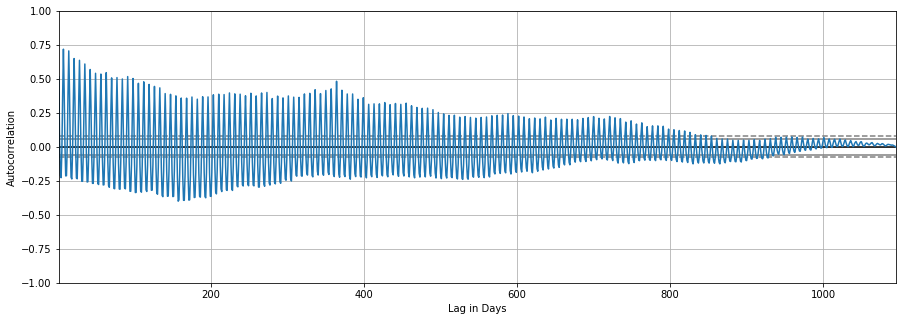

In [88]:
EDA_2(sales_ts)

In [89]:
def Stationarity_plot(sales_ts):
    # load and plot a time series
    from matplotlib import pyplot
    # line plot 
    pyplot.figure(figsize=(15,5))
    pyplot.subplot(211) 
    pyplot.title('Statationarity Plots')
    pyplot.plot(sales_ts) 
    # histogram 
    pyplot.subplot(212) 
    pyplot.hist(sales_ts) 
    pyplot.show()

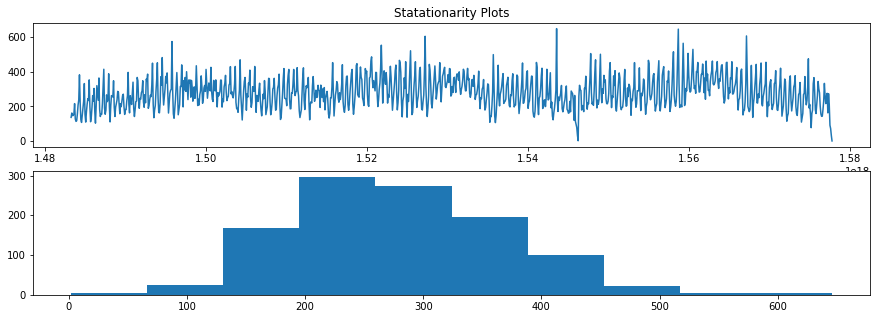

In [90]:
#The goal is to get the line plot to be a straight line and the histogram to be a uniform dist or norm dist

Stationarity_plot(sales_ts)

# Trailing Moving Average: Base Model

In [91]:
#BASE MODEL Trailing Moving Average Model ( (t-2)+(t-1)+(t) )/3

#Write a function that uses Trailing Model Average to forecast values
def TMA_Model(sales_ts, winsize=3):
    # moving average smoothing as a forecast model
    from math import sqrt
    from numpy import mean
    from sklearn.metrics import mean_squared_error
    from matplotlib import pyplot
    series = sales_ts

    # prepare situation
    X = series.values
    window = winsize
    history = [X[i] for i in range(window)]
    test = [X[i] for i in range(window, len(X))] 
    predictions = list()

    pred_lst = []
    # walk forward over time steps in test
    for t in range(len(test)):
        length = len(history)
        yhat = mean([history[i] for i in range(length-window,length)]) 
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
        pred_lst.append('predicted=%f : expected=%f' % (yhat, obs))

    #print(pred_lst)
    rmse = sqrt(mean_squared_error(test, predictions)) 
    print('Test RMSE: %.3f' % rmse)

    # plot
    pyplot.plot(test)
    pyplot.plot(predictions, color='red') 
    pyplot.title('Actual Vs Predictions Line Plots')
    pyplot.ylabel('Sales Qty')
    pyplot.xlabel('Days')
    pyplot.show()
    # zoom plot
    pyplot.plot(test[:100]) 
    pyplot.plot(predictions[:100], color='red') 
    pyplot.ylabel('Sales Qty')
    pyplot.xlabel('Days')
    pyplot.show()
    
    return pred_lst



Test RMSE: 104.059


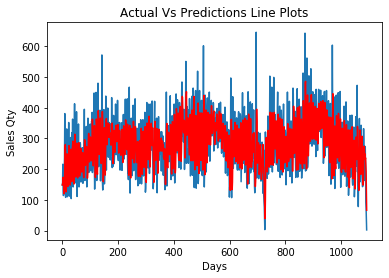

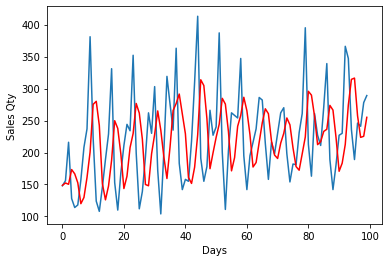

['predicted=148.666667 : expected=148.000000',
 'predicted=152.333333 : expected=156.000000',
 'predicted=150.333333 : expected=216.000000',
 'predicted=173.333333 : expected=128.000000',
 'predicted=166.666667 : expected=114.000000',
 'predicted=152.666667 : expected=118.000000',
 'predicted=120.000000 : expected=157.000000',
 'predicted=129.666667 : expected=208.000000',
 'predicted=161.000000 : expected=237.000000',
 'predicted=200.666667 : expected=381.000000',
 'predicted=275.333333 : expected=222.000000',
 'predicted=280.000000 : expected=124.000000',
 'predicted=242.333333 : expected=108.000000',
 'predicted=151.333333 : expected=146.000000',
 'predicted=126.000000 : expected=189.000000',
 'predicted=147.666667 : expected=229.000000',
 'predicted=188.000000 : expected=331.000000',
 'predicted=249.666667 : expected=153.000000',
 'predicted=237.666667 : expected=110.000000',
 'predicted=198.000000 : expected=168.000000',
 'predicted=143.666667 : expected=211.000000',
 'predicted=1

In [92]:
TMA_Model(sales_ts)

In [93]:
#Created a function just to calc RMSE for TMA models

def TMA_Model_RMSE(sales_ts, winsize=3):
    # moving average smoothing as a forecast model
    from math import sqrt
    from numpy import mean
    from sklearn.metrics import mean_squared_error
    series = sales_ts

    # prepare situation
    X = series.values
    window = winsize
    history = [X[i] for i in range(window)]
    test = [X[i] for i in range(window, len(X))] 
    predictions = list()

    pred_lst = []
    # walk forward over time steps in test
    for t in range(len(test)):
        length = len(history)
        yhat = mean([history[i] for i in range(length-window,length)]) 
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
        pred_lst.append('predicted=%f : expected=%f' % (yhat, obs))

    #print(pred_lst)
    rmse = sqrt(mean_squared_error(test, predictions)) 
    
    
    return rmse

In [94]:
#Created a function to find optimal window size for TMA model with plot

def TMA_Window_Plot(sales_ts):
    from matplotlib import pyplot
    
    window_count = []
    rmse_lst = []
    for w in range(1, 31):
        window_count.append(w)
        rmse_lst.append(TMA_Model_RMSE(sales_ts,w))
    
    
    window_count = np.array(window_count)
    rmse_lst = np.array(rmse_lst)
    
    best_window = int(window_count[rmse_lst.argsort()][:1])
    best_score = rmse_lst.min()
    
    # plot
    pyplot.figure(figsize=(20,5))
    pyplot.plot(window_count, rmse_lst)
    pyplot.axvline(best_window, color='r',linestyle='--' )
    pyplot.title('Window Size RMSE Plot')
    pyplot.ylabel('RMSE')
    pyplot.xlabel('Window Size')
    pyplot.grid()
    pyplot.xticks(np.arange(0,31,1))
    pyplot.yticks(np.arange(75,111,5) )
    pyplot.show() 
    
    
    print('The Best Window Size is: {}\nRMSE Score: {}'.format(best_window,best_score))
    
    return window_count, rmse_lst 

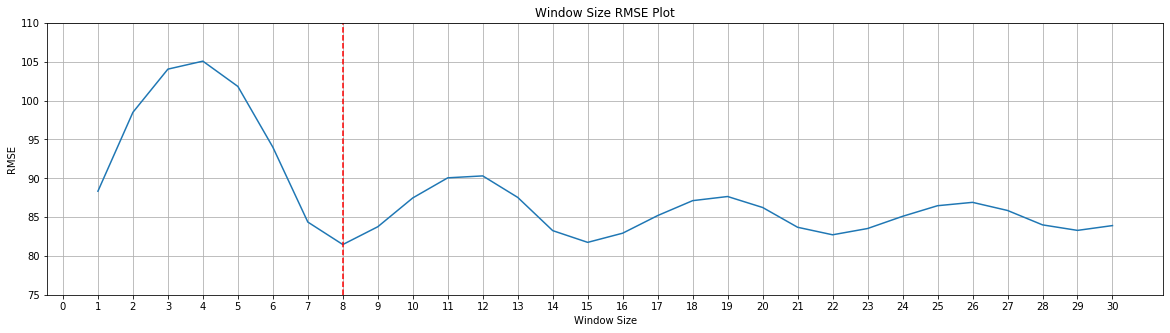

The Best Window Size is: 8
RMSE Score: 81.47161650325329


In [95]:
#Adding window_count list to w and RMSE_lst to r in case I want to reseach the values more

w, r = TMA_Window_Plot(sales_ts)

Test RMSE: 81.472


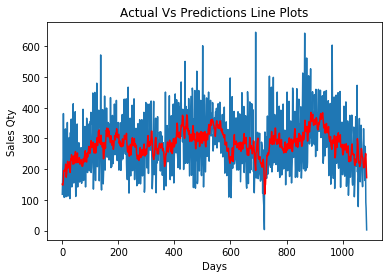

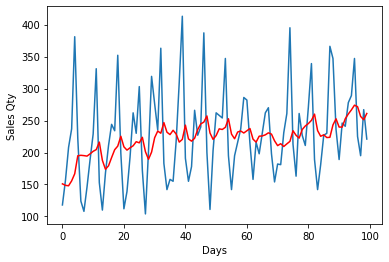

['predicted=151.000000 : expected=118.000000',
 'predicted=148.625000 : expected=157.000000',
 'predicted=148.000000 : expected=208.000000',
 'predicted=155.625000 : expected=237.000000',
 'predicted=166.750000 : expected=381.000000',
 'predicted=194.875000 : expected=222.000000',
 'predicted=195.625000 : expected=124.000000',
 'predicted=195.125000 : expected=108.000000',
 'predicted=194.375000 : expected=146.000000',
 'predicted=197.875000 : expected=189.000000',
 'predicted=201.875000 : expected=229.000000',
 'predicted=204.500000 : expected=331.000000',
 'predicted=216.250000 : expected=153.000000',
 'predicted=187.750000 : expected=110.000000',
 'predicted=173.750000 : expected=168.000000',
 'predicted=179.250000 : expected=211.000000',
 'predicted=192.125000 : expected=244.000000',
 'predicted=204.375000 : expected=234.000000',
 'predicted=210.000000 : expected=352.000000',
 'predicted=225.375000 : expected=199.000000',
 'predicted=208.875000 : expected=112.000000',
 'predicted=2

In [96]:
TMA_Model(sales_ts,8)

In [73]:
#Create a function to box-cox transform data and plot results
def Box_Cox_Transform_Plot(sales_ts):
    # automatically box-cox transform a time series
    from pandas import DataFrame
    from scipy.stats import boxcox
    from matplotlib import pyplot
    dataframe = DataFrame(sales_ts.values)
    dataframe.columns = ['sales']
    dataframe['sales'], lam = boxcox(dataframe['sales']) 
    print('Lambda: %f' % lam)
    pyplot.figure(1)
    # line plot
    pyplot.figure(figsize=(15,5))
    pyplot.subplot(211)
    pyplot.title('Statationarity Plots: Box-Cox Transformed')
    pyplot.plot(dataframe['sales'])
    # histogram
    pyplot.subplot(212)
    pyplot.hist(dataframe['sales'])
    pyplot.show()

Lambda: 0.704523


<Figure size 432x288 with 0 Axes>

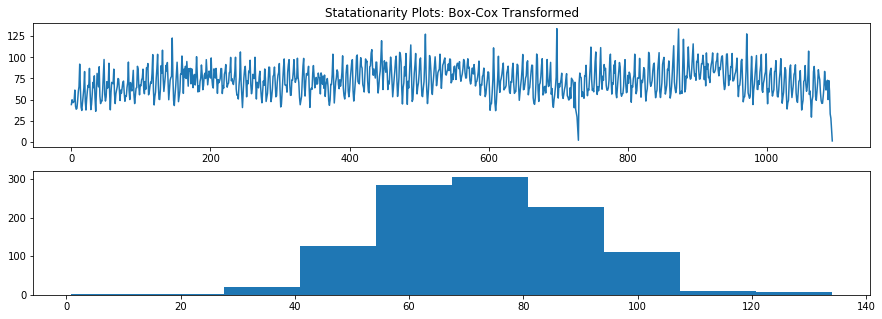

In [74]:
#The line plot looks roughly the same but the histogram looks more Norm Dist.
Box_Cox_Transform_Plot(sales_ts)

Test RMSE: 19.590


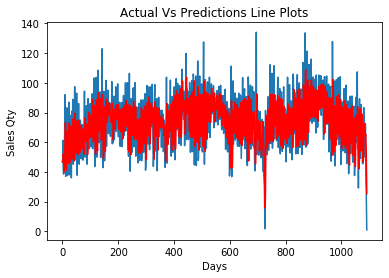

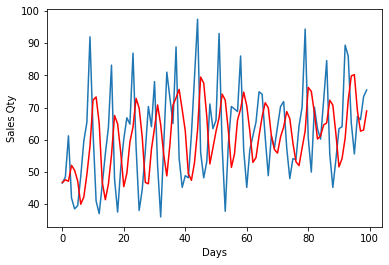

['predicted=46.693774 : expected=46.565394',
 'predicted=47.540824 : expected=48.378503',
 'predicted=47.093547 : expected=61.210346',
 'predicted=52.051414 : expected=41.899982',
 'predicted=50.496277 : expected=38.505253',
 'predicted=47.205193 : expected=39.487154',
 'predicted=39.964130 : expected=48.603186',
 'predicted=42.198531 : expected=59.567033',
 'predicted=49.219124 : expected=65.441021',
 'predicted=57.870413 : expected=91.997451',
 'predicted=72.335168 : expected=62.431044',
 'predicted=73.289839 : expected=40.941784',
 'predicted=65.123426 : expected=37.013060',
 'predicted=46.795296 : expected=46.107634',
 'predicted=41.354159 : expected=55.587051',
 'predicted=46.235915 : expected=63.842942',
 'predicted=55.179209 : expected=83.182674',
 'predicted=67.537556 : expected=47.701882',
 'predicted=64.909166 : expected=37.513117',
 'predicted=56.132558 : expected=51.047559',
 'predicted=45.420853 : expected=60.185427',
 'predicted=49.582034 : expected=66.826304',
 'predicte

In [20]:
TMA_Model(sales_ts, 3)

In [98]:
#The transformation took the square root of values. I must square to put back in original units
#The NON-Transformed model has a better RMSE. Not going to use this transformation going forward
#ORIG RMSE:104;     TRANSFORM RMSE:383;      ORIG W/ WINDOW SIZE 8 RMSE:81
19.590**2

383.7681

# ARIMA MODEL